In [2]:
import pandas as pd
import numpy as np
import plotly as py
import plotly.graph_objs as go
import ipywidgets as widgets
import warnings

py.offline.init_notebook_mode(connected = True)
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel("data.xlsx")

In [4]:
df.head()

,class,preprocessed-text,source,text,title
0,-1,NaN,algerie360,Yazid AlilatIl a évoqué à la radio nationale é...,Médicaments: Des anticancéreux bientôt produit...
1,-1,NaN,AlgeriePart,"VEON, a publié aujourd’hui les chiffres de l’e...",La descente aux enfers de l’ex-leader de la té...
2,-1,NaN,AlgeriePart,"VEON, a publié aujourd’hui les chiffres de l’e...",NaN
3,-1,NaN,AlgeriePart,Une vidéo inédite obtenue par Algériepart retr...,Vidéo inédite. La colère des employés de djezz...
4,-1,NaN,AlgeriePart,Une grosse pagaille a secoué lundi l’aéroport ...,NaN


In [5]:
df = df.replace('elwatan','Elwatan')
df_agg = df.groupby('source').count()[['class']]

In [6]:
df_agg.columns = ['count']
df_agg['sources'] = ['Algerie Part', 'El Watan', 'Algerie360']
df_agg['percentage'] = (df_agg['count']*100)/df_agg['count'].sum()
df_agg['percentage'] = df_agg['percentage'].round(2)

In [30]:
layout = go.Layout(
    title = "Ditribution des Articles par Source",
    yaxis = go.layout.YAxis(
        tickfont = dict(
            size = 18
        ),
        automargin = True
    )
)

data = [go.Bar(
            x = df_agg['percentage'],
            y = df_agg['sources'],
            text = df_agg['percentage'],
            textposition = 'auto',
            orientation = 'h'
)]

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig, filename='horizontal-bar')

In [31]:
layout = go.Layout(
    title = "Ditribution des Articles par Source",
    xaxis = go.layout.XAxis(
        tickfont = dict(
            size = 18
        ),
        automargin = True
    )
)

data = [go.Bar(
            x = df_agg['sources'],
            y = df_agg['percentage'],
            text = df_agg['percentage'],
            textposition = 'auto',
            orientation = 'v'
)]

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig, filename='horizontal-bar')

In [9]:
layout = go.Layout(
    title = "Ditribution des Articles par Classe",
    xaxis = go.layout.XAxis(
        tickfont = dict(
            size = 18
        ),
        automargin = True
    )
)
X = ['Positive', 'Négative', 'Neutre']
v1 = len(df[df['class']==1])*100/len(df) 
v2 = len(df[df['class']==-1])*100/len(df) 
v3 = len(df[df['class']==0])*100/len(df)  
data = [go.Bar(
            x = X,
            y = [v1,v2,v3],
            text = [round(v1,2),round(v2,2),round(v3,2)],#df_agg['percentage'],
            textposition = 'auto',
            orientation = 'v'
)]

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig, filename='horizontal-bar')

In [28]:
layout = go.Layout(
    title='<b>Ditribution des Articles par Source et par Classe</b>',
    yaxis=dict(
        title='<i>(Pourcentage)</i>'
    ),
    barmode='stack'
)
sources = ['Algerie360', 'El Watan', 'Algerie Part']
p1 = len(df[(df['class'] == 1) & (df['source']=='algerie360')])
p2 = len(df[(df['class'] == 1) & (df['source']=='AlgeriePart')])
p3 = len(df[(df['class'] == 1) & (df['source']=='Elwatan')])

n1 = len(df[(df['class'] == -1) & (df['source']=='algerie360')])
n2 = len(df[(df['class'] == -1) & (df['source']=='AlgeriePart')])
n3 = len(df[(df['class'] == -1) & (df['source']=='Elwatan')])

nn1 = len(df[(df['class'] == 0) & (df['source']=='algerie360')])
nn2 = len(df[(df['class'] == 0) & (df['source']=='AlgeriePart')])
nn3 = len(df[(df['class'] == 0) & (df['source']=='Elwatan')])

trace1 = go.Bar(
    x=sources,
    y=[p1, p2, p3],
    name='positive',
    marker=dict(
        color = 'green'
    ),
    text = [n1, n2, n3],
    textposition = 'auto'
    
)
trace2 = go.Bar(
    x=sources,
    y=[n1, n2, n3],
    name='negative',
     marker=dict(
        color = 'red'
    ),
    text = [20, 15, 30],
    textposition = 'auto'
)
trace3 = go.Bar(
    x=sources,
    y=[nn1, nn2, nn3],
    name='neutre',
     marker=dict(
        color = 'orange'
    ),
    text = [45, 15, 30],
    textposition = 'auto'
)


data = [trace1, trace2, trace3]
layout = layout

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig, filename='stacked-bar')

In [22]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image

In [12]:
_text = " ".join(review for review in df.text)
print ("There are {} words in the combination of all articles.".format(len(_text)))

There are 15137688 words in the combination of all articles.


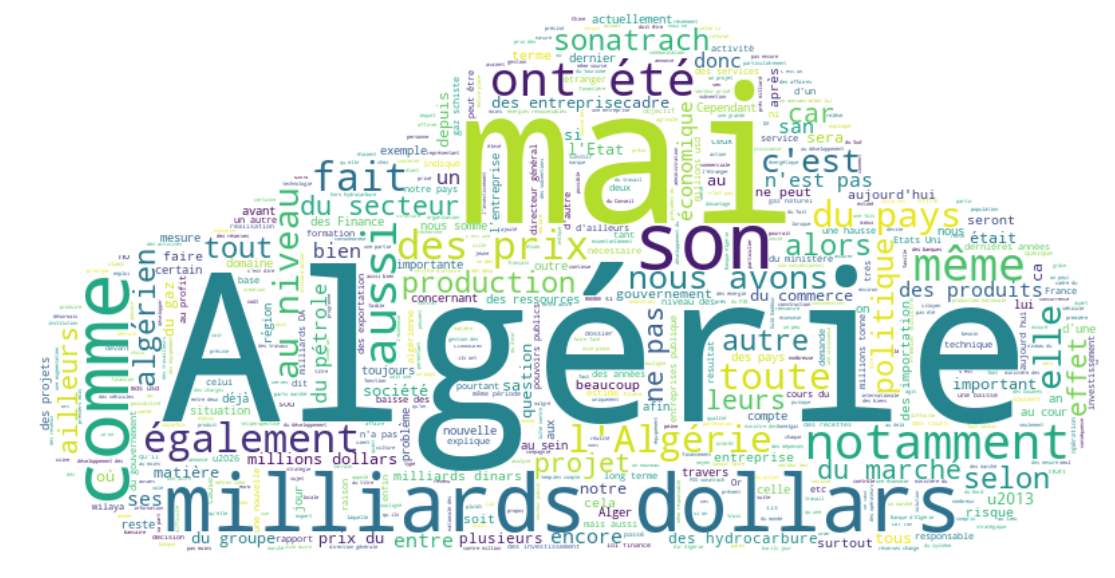

In [26]:
stopwords = set()
stopwords.update(["avec", "leur","sur", "le", "dans", "la", "pour", "que", "et", "de", "ce", "en", "cette", 
                  "les", "plus", "ou", "par", "qui", "sont", "dont", "ainsi", "est", "se", "ces", "il", "son"
                  "comme"])
mask = np.array(Image.open("cloud.png"))
wordcloud = WordCloud(width=1920, height=1280, stopwords=stopwords, max_words=1000000, 
                      background_color="white", mask=mask).generate(_text)

plt.figure(figsize=[20,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

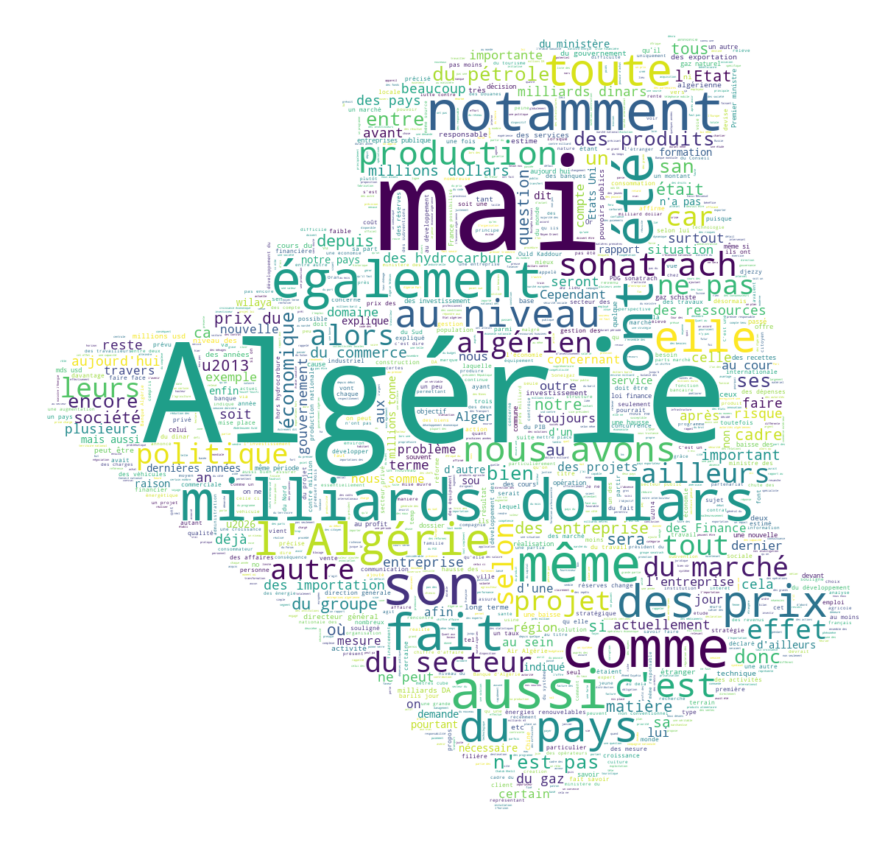

In [29]:
stopwords = set()
stopwords.update(["avec", "leur","sur", "le", "dans", "la", "pour", "que", "et", "de", "ce", "en", "cette", 
                  "les", "plus", "ou", "par", "qui", "sont", "dont", "ainsi", "est", "se", "ces", "il", "son"
                  "comme"])
mask = np.array(Image.open("algeria.png"))
wordcloud = WordCloud(width=1920, height=1280, stopwords=stopwords, max_words=1000000, 
                      background_color="white", mask=mask).generate(_text)

plt.figure(figsize=[25,15])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()